In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import *

%matplotlib inline

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

In [5]:
df = pd.read_feather('vocalization_df.feather')

df_c2 = df[df.cohort=='c2']
df_c4 = df[df.cohort=='c4']
df_c5 = df[df.cohort=='c5']

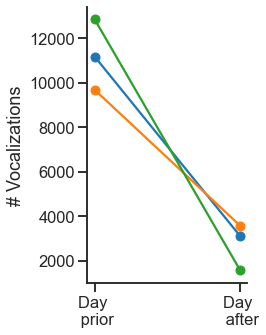

In [20]:
#pups taken out
#c2 8_4
#c4 10_7
#c5 1_5

pre_24h = np.array([np.sum(df_c2.date == '8_3'), 
                    np.sum(df_c4.date == '10_6'), 
                    np.sum(df_c5.date == '1_4')])

post_24h = np.array([np.sum(df_c2.date == '8_5'), 
                     np.sum(df_c4.date == '10_8'), 
                     np.sum(df_c5.date == '1_6')])  

figure(figsize=(4,5))
plot([0,1], list(zip(pre_24h, post_24h))[0], 'o-')
plot([0,1], list(zip(pre_24h, post_24h))[1], 'o-')
plot([0,1], list(zip(pre_24h, post_24h))[2], 'o-')

ylabel('# Vocalizations')
xticks([0,1], ('Day \n prior', 'Day \n after'))

sns.despine()
tight_layout()

# probability densities 

In [26]:
c2 = np.vstack(df_c2.latent_mean_umap.values)
c4 = np.vstack(df_c4.latent_mean_umap.values)
c5 = np.vstack(df_c5.latent_mean_umap.values)

_bins = 50
c2_heatmap = np.rot90(np.histogram2d(c2[:,0], c2[:,1], bins=_bins)[0]/np.histogram2d(c2[:,0], c2[:,1], bins=_bins)[0].sum())*100
c4_heatmap = np.rot90(np.histogram2d(c4[:,0], c4[:,1], bins=_bins)[0]/np.histogram2d(c4[:,0], c4[:,1], bins=_bins)[0].sum())*100
c5_heatmap = np.rot90(np.histogram2d(c5[:,0], c5[:,1], bins=_bins)[0]/np.histogram2d(c5[:,0], c5[:,1], bins=_bins)[0].sum())*100

_bins = 50
h, xedges, yedges = np.histogram2d(np.vstack(df.latent_mean_umap.values)[:,0], 
                            np.vstack(df.latent_mean_umap.values)[:,1], bins=_bins)

In [27]:
c2_pre = c2[df_c2.date == '8_3']
c2_post = c2[df_c2.date == '8_5']

c4_pre = c4[df_c4.date == '10_6']
c4_post = c4[df_c4.date == '10_8']

c5_pre = c5[df_c5.date == '1_4']
c5_post = c5[df_c5.date == '1_6']

c2_pre_heatmap = np.rot90(np.histogram2d(c2_pre[:,0], c2_pre[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c2_pre[:,0], c2_pre[:,1], bins=(xedges,yedges))[0].sum())*100
c2_post_heatmap = np.rot90(np.histogram2d(c2_post[:,0], c2_post[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c2_post[:,0], c2_post[:,1], bins=(xedges,yedges))[0].sum())*100

c4_pre_heatmap = np.rot90(np.histogram2d(c4_pre[:,0], c4_pre[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c4_pre[:,0], c4_pre[:,1], bins=(xedges,yedges))[0].sum())*100
c4_post_heatmap = np.rot90(np.histogram2d(c4_post[:,0], c4_post[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c4_post[:,0], c4_post[:,1], bins=(xedges,yedges))[0].sum())*100

c5_pre_heatmap = np.rot90(np.histogram2d(c5_pre[:,0], c5_pre[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c5_pre[:,0], c5_pre[:,1], bins=(xedges,yedges))[0].sum())*100
c5_post_heatmap = np.rot90(np.histogram2d(c5_post[:,0], c5_post[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c5_post[:,0], c5_post[:,1], bins=(xedges,yedges))[0].sum())*100

In [28]:
outline = np.load('umap_outline_c245_v2.npy')

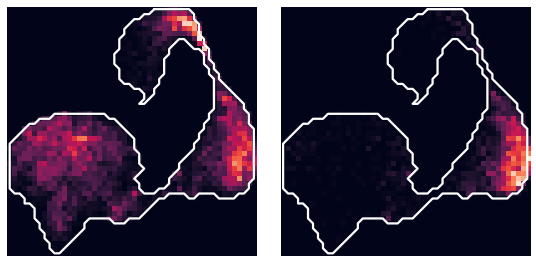

In [29]:
figure(figsize=(8,4))

subplot(121)
imshow(c2_pre_heatmap)
plot(outline[:,0], -outline[:,1], 'w')
xticks([])
yticks([])
axis('off')

subplot(122)
imshow(c2_post_heatmap)
plot(outline[:,0], -outline[:,1], 'w')
xticks([])
yticks([])
axis('off')

tight_layout()
tight_layout()
# savefig('pupOut_c2.png', dpi=300, transparent=True)

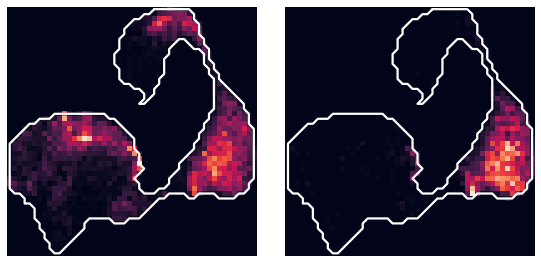

In [30]:
figure(figsize=(8,4))

subplot(121)
imshow(c4_pre_heatmap)
plot(outline[:,0], -outline[:,1], 'w')
xticks([])
yticks([])
axis('off')

subplot(122)
imshow(c4_post_heatmap)
plot(outline[:,0], -outline[:,1], 'w')
xticks([])
yticks([])
axis('off')

tight_layout()
# savefig('pupOut_c4.png', dpi=300, transparent=True)

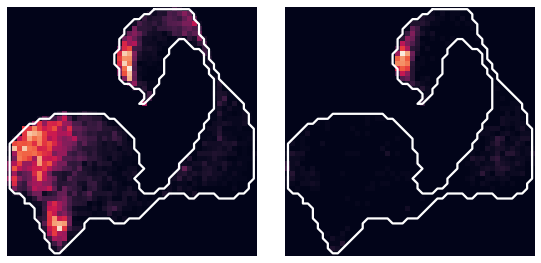

In [31]:
figure(figsize=(8,4))

subplot(121)
imshow(c5_pre_heatmap)
plot(outline[:,0], -outline[:,1], 'w')
xticks([])
yticks([])
axis('off')

subplot(122)
imshow(c5_post_heatmap)
plot(outline[:,0], -outline[:,1], 'w')
xticks([])
yticks([])
axis('off')

tight_layout()
# savefig('pupOut_c5.png', dpi=300, transparent=True)

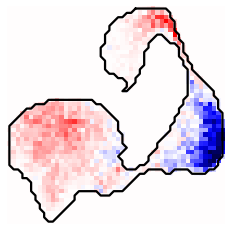

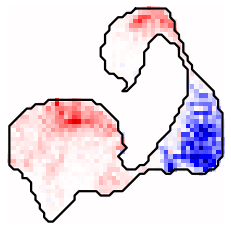

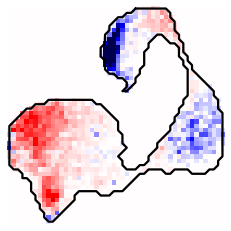

In [32]:
figure()
imshow(c2_pre_heatmap-c2_post_heatmap, cmap='seismic', clim=(-1,1))
plot(outline[:,0], -outline[:,1], 'k')
xticks([])
yticks([])
axis('off')
savefig('f2_pups.png', dpi=300)

figure()
imshow(c4_pre_heatmap-c4_post_heatmap, cmap='seismic', clim=(-1,1))
plot(outline[:,0], -outline[:,1], 'k')
xticks([])
yticks([])
axis('off')
savefig('f4_pups.png', dpi=300)

figure()
imshow(c5_pre_heatmap-c5_post_heatmap, cmap='seismic', clim=(-1,1))
plot(outline[:,0], -outline[:,1], 'k')
xticks([])
yticks([])
axis('off')
savefig('f5_pups.png', dpi=300)

In [33]:
np.sum(np.abs(c2_pre_heatmap-c2_post_heatmap))

118.64039535710539

In [34]:
np.sum(np.abs(c4_pre_heatmap-c4_post_heatmap))

102.71383605551651

In [35]:
np.sum(np.abs(c5_pre_heatmap-c5_post_heatmap))

147.89846215554047

In [36]:
hms_c2 = []
for date in df_c2.date.unique():
    c = c2[df_c2.date == date]
    hm = np.rot90(np.histogram2d(c[:,0], c[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c[:,0], c[:,1], bins=(xedges,yedges))[0].sum())*100
    hms_c2.append(hm)
    
hms_c4 = []
for date in df_c4.date.unique():
    c = c4[df_c4.date == date]
    hm = np.rot90(np.histogram2d(c[:,0], c[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c[:,0], c[:,1], bins=(xedges,yedges))[0].sum())*100
    hms_c4.append(hm)
    
hms_c5 = []
for date in df_c5.date.unique():
    c = c5[df_c5.date == date]
    hm = np.rot90(np.histogram2d(c[:,0], c[:,1], bins=(xedges,yedges))[0]/np.histogram2d(c[:,0], c[:,1], bins=(xedges,yedges))[0].sum())*100
    hms_c5.append(hm)
    
hms_c2 = np.array(hms_c2)
hms_c4 = np.array(hms_c4)
hms_c5 = np.array(hms_c5)

sums_c2 = [np.sum(i) for i in np.abs(np.diff(hms_c2, axis=0))]
sums_c4 = [np.sum(i) for i in np.abs(np.diff(hms_c4, axis=0))]
sums_c5 = [np.sum(i) for i in np.abs(np.diff(hms_c5, axis=0))]

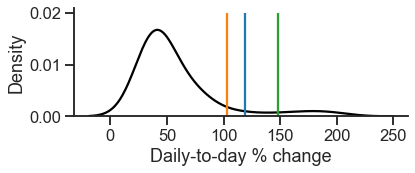

In [37]:
figure(figsize=(6,2))
sns.kdeplot(sums_c2+sums_c4+sums_c5, color='k')
vlines(np.sum(np.abs(c2_pre_heatmap-c2_post_heatmap)), 0, 0.02, label='Family 1', color='C0')
vlines(np.sum(np.abs(c4_pre_heatmap-c4_post_heatmap)), 0, 0.02, label='Family 2', color='C1')
vlines(np.sum(np.abs(c5_pre_heatmap-c5_post_heatmap)), 0, 0.02, label='Family 3', color='C2')
# legend()
xlabel('Daily-to-day % change')
ylabel('Density')
sns.despine()
savefig('daily_percent_change.svg')